In [2]:
import numpy as np
import pylab as  plt
import os
import requests

In [4]:
data = np.load("../Daten/RKI/rki.npy")

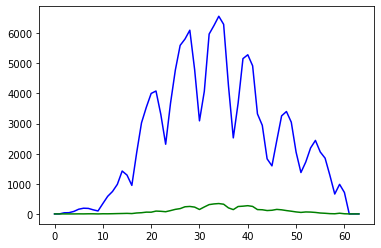

In [5]:
plt.plot(data[:,0], 'b')
plt.plot(data[:,1], 'g')


In [6]:
def compute_dt_Rt(data, c):
    dt = data[c:,0]/data[0:-c,0]
    limit = np.exp(4.0/50)
    dt = np.where(dt < limit, limit, dt)
    dt = np.log(dt) / 4.0

    a = []
    b = []
    for i in range(len(data[:,0])-2*c):
        a.append(np.sum(data[i:i+c,0]))
        b.append(np.sum(data[i+c:i+2*c,0]))
    a = np.array(a)
    b = np.array(b)
    a = np.where(a == 0, 1, a)
    Rt = b/a
    
    return dt, Rt


In [28]:
def compute_Rt(data, c):
    x = np.mgrid[-1.0:1.0:c*1j]
    w = np.exp(-x**2*3.0**2)
    w = np.ones(c)*0.25
    w = w / np.sum(w)
    
    a = []
    b = []
    for i in range(c,len(data[:,0])):
        a.append(np.sum(data[i-c:i,0]*w))
        b.append(data[i,0])
    a = np.array(a)
    b = np.array(b)
    a = np.where(a == 0, 1, a)
    Rt = b/a
    #plt.plot(Rt)
    #plt.axis([None,None,0.5,1.5])
    return Rt


In [41]:
def plot_Rt(Rt1, Rt2):
    n1 = len(Rt1)
    t1 = np.mgrid[0.0:n1:n1*1j]
    n2 = len(Rt2)
    t2 = np.mgrid[0.0:n2:n2*1j]
    
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('time [days]')
    ax1.set_ylabel('Rt')

    ax1.plot(t1, Rt1, 'r')
    ax1.plot(t2, Rt2, 'm')
    plt.axis([None,None,0.0,4.0])
    #ax1.tick_params(axis='y', labelcolor='b')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped


Rt1 = 0.289920
Rt2 = 0.597190


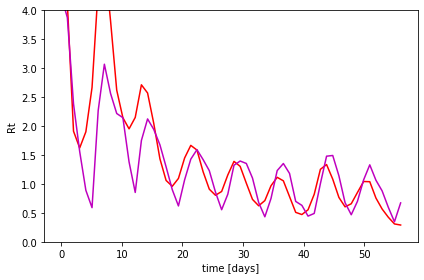

In [42]:

dt1, Rt1 = compute_dt_Rt(data,4)
Rt2 = compute_Rt(data,4)
plot_Rt(Rt1, Rt2[:-4])
print("Rt1 = %f" % Rt1[-1])
print("Rt2 = %f" % Rt2[-4])




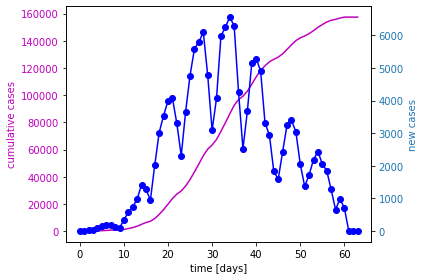

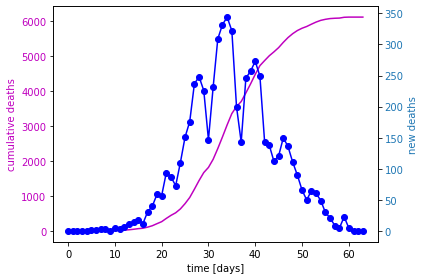

In [39]:
fig, ax1 = plt.subplots()

color = 'm'
ax1.set_xlabel('time [days]')
ax1.set_ylabel('cumulative cases', color=color)
ax1.plot(data[:,0].cumsum(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('new cases', color=color)  # we already handled the x-label with ax1
ax2.plot(data[:,0], 'b')#color=color)
ax2.plot(data[:,0], 'bo')#color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

###########################################################

fig, ax1 = plt.subplots()

color = 'm'
ax1.set_xlabel('time [days]')
ax1.set_ylabel('cumulative deaths', color=color)
ax1.plot(data[:,1].cumsum(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('new deaths', color=color)  # we already handled the x-label with ax1
ax2.plot(data[:,1], 'b')
ax2.plot(data[:,1], 'bo')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped


In [40]:
# https://www.spiegel.de/wissenschaft/medizin/corona-nur-sechs-prozent-der-weltweiten-faelle-werden-erfasst-a-c9520fce-a102-49fe-8290-fec96fa8ed40
mortality = 1.38e-2
cumulative_deaths = 732
cumulative_detected_14_adys_before = 8198
a = (cumulative_deaths / cumulative_detected_14_adys_before / mortality) # a = 6.5, 1/a = 0.15 = 15%
print(a, 1/a)

6.470294981808926 0.15455245901639342


In [ ]:
def w(t):
    

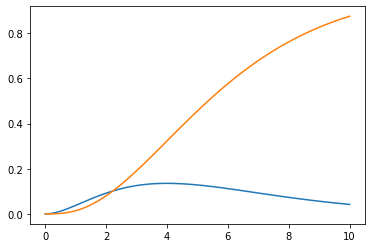

In [64]:
from scipy.stats import gamma
x = np.mgrid[0.0:10.0:100j]
a, loc, scale = 3.0, 0.0, 2.0
g = gamma.pdf(x, a, loc, scale)
plt.plot(x, g)
plt.plot(x, gamma.cdf(x, a, loc, scale))
